# Exercício de Programação: Regressão Polinomial e Curvas de Aprendizado

Este exercício aborda os conceitos de Regressão Polinomial e Curvas de Aprendizado.

**Objetivos:**
1. Gerar dados sintéticos a partir de uma função quadrática.
2. Ajustar modelos de Regressão Polinomial de diferentes graus aos dados.
3. Visualizar e interpretar as curvas de aprendizado para modelos que estão subajustando (underfitting) e sobreajustando (overfitting).

## Configuração Inicial

Primeiro, vamos importar as bibliotecas necessárias.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

## Parte 1: Gerar Dados Sintéticos

Nesta seção, você irá gerar um conjunto de dados não linear com base em uma função quadrática. A ideia é criar dados que um modelo linear simples não conseguiria ajustar bem, necessitando de uma abordagem polinomial.

**Instruções:**
- Crie 100 instâncias.
- O atributo `X` deve ser um array de números aleatórios entre -5 e 5.
- O alvo `y` deve ser calculado usando a fórmula: `y = 2 * X**2 + 3 * X + 5 + ruído`, onde `ruído` é um ruído gaussiano (normal padrão) multiplicado por 5 (use `np.random.randn`).

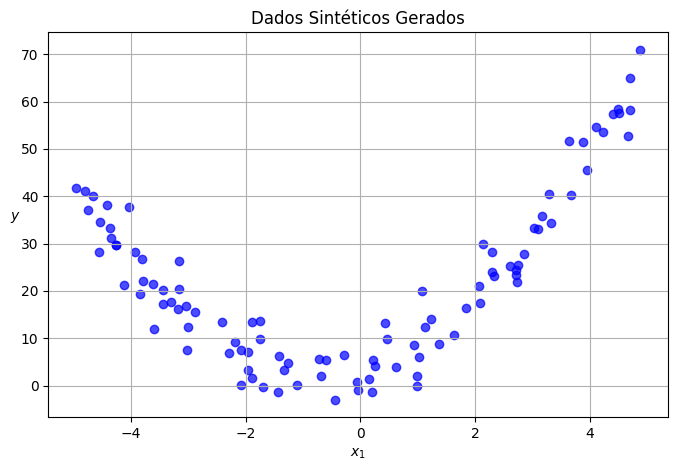

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a semente para reprodutibilidade
np.random.seed(42)
m = 100

# Gerando os dados sintéticos
X = np.random.uniform(-5, 5, m)
ruido = 5 * np.random.randn(m)
y = 2 * X**2 + 3 * X + 5 + ruido

# Plotando os dados gerados
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title("Dados Sintéticos Gerados")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid(True)
plt.show()


## Parte 2: Ajustar Modelos de Regressão Polinomial

Agora, vamos usar a classe `PolynomialFeatures` do Scikit-Learn para criar modelos de regressão polinomial de diferentes graus e visualizar como eles se ajustam aos dados.

**Instruções:**
- Crie e ajuste três modelos de regressão polinomial:
  1. Grau 1 (um modelo linear simples).
  2. Grau 2 (um modelo quadrático, que deve se ajustar bem).
  3. Grau 300 (um modelo de grau muito alto, para demonstrar o sobreajuste).
- Plote as predições de cada modelo sobre os dados originais.

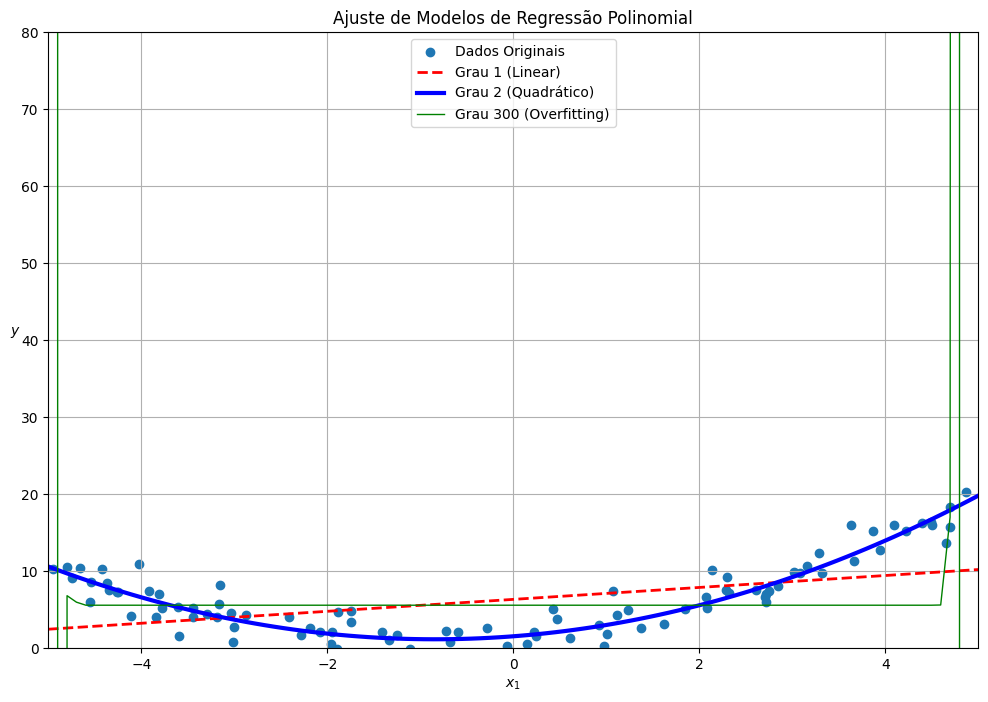

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Gerando dados de exemplo (caso ainda não tenha)
np.random.seed(42)
X = np.random.uniform(-5, 5, 100)
y = 0.5 * X**2 + X + 2 + np.random.randn(100) * 2

# Corrigindo o formato de X para 2D
X = X.reshape(-1, 1)

# Criando pontos para plotar as curvas dos modelos
X_new = np.linspace(-5, 5, 100).reshape(100, 1)

# Iniciando o gráfico
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label="Dados Originais")

# Modelo grau 1 (linear)
poly_reg_1 = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), LinearRegression())
poly_reg_1.fit(X, y)
y_new_1 = poly_reg_1.predict(X_new)
plt.plot(X_new, y_new_1, "r--", linewidth=2, label="Grau 1 (Linear)")

# Modelo grau 2 (quadrático)
poly_reg_2 = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_reg_2.fit(X, y)
y_new_2 = poly_reg_2.predict(X_new)
plt.plot(X_new, y_new_2, "b-", linewidth=3, label="Grau 2 (Quadrático)")

# Modelo grau 300 (overfitting)
poly_reg_300 = make_pipeline(PolynomialFeatures(degree=300, include_bias=False), LinearRegression())
poly_reg_300.fit(X, y)
y_new_300 = poly_reg_300.predict(X_new)
plt.plot(X_new, y_new_300, "g-", linewidth=1, label="Grau 300 (Overfitting)")

# Finalizando o gráfico
plt.title("Ajuste de Modelos de Regressão Polinomial")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend()
plt.axis([-5, 5, 0, 80])
plt.grid(True)
plt.show()


## Parte 3: Curvas de Aprendizado para um Modelo com Subajuste (Underfitting)

As curvas de aprendizado são uma ferramenta importante para diagnosticar se um modelo está com subajuste, sobreajuste ou se está adequado. Elas plotam o erro do modelo nos dados de treino e de validação em função do tamanho do conjunto de treinamento.

**Instruções:**
- Use a função `learning_curve` do Scikit-Learn para gerar os dados das curvas de aprendizado para um modelo de **Regressão Linear** simples.
- Plote as curvas (erro de treino vs. erro de validação).

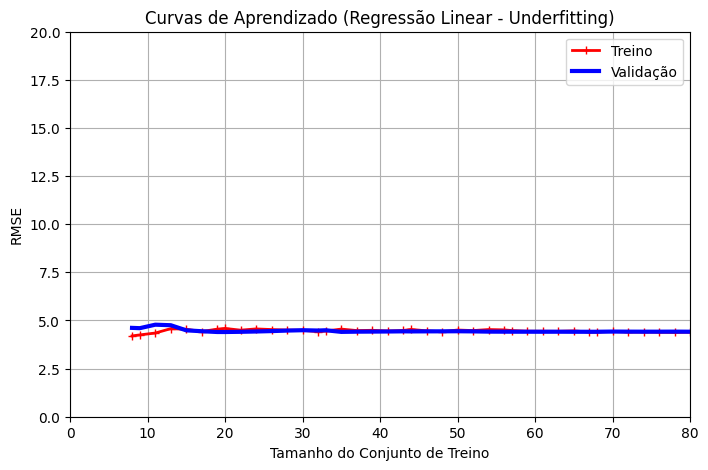

In [38]:
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 40),
        cv=5, scoring="neg_root_mean_squared_error")
    
    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Treino")
    plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validação")
    plt.xlabel("Tamanho do Conjunto de Treino")
    plt.ylabel("RMSE")
    plt.grid(True)
    plt.legend()
    plt.axis([0, 80, 0, 20])

# TODO: Gere as curvas de aprendizado para o modelo de Regressão Linear
# Dica: instancie LinearRegression e chame a função plot_learning_curves.
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

plt.title("Curvas de Aprendizado (Regressão Linear - Underfitting)")
plt.show()


**Análise das Curvas de Aprendizado (Regressão Linear):**

As curvas de aprendizado para o modelo linear mostram um comportamento típico de subajuste (underfitting). Ambas as curvas (treino e validação) atingem um platô, ficando próximas uma da outra, mas com um erro relativamente alto. Isso indica que o modelo é muito simples para capturar a complexidade dos dados, e adicionar mais exemplos de treino não melhorará o desempenho.

## Parte 4: Curvas de Aprendizado para um Modelo com Sobreajuste (Overfitting)

Agora, vamos ver como são as curvas de aprendizado para um modelo complexo que sobreajusta os dados.

**Instruções:**
- Crie um pipeline para um modelo de **Regressão Polinomial de grau 10**.
- Use a mesma função `plot_learning_curves` para gerar e plotar as curvas de aprendizado.

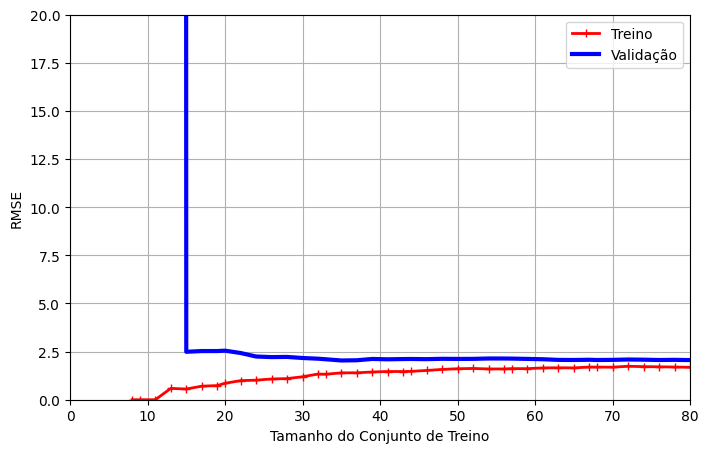

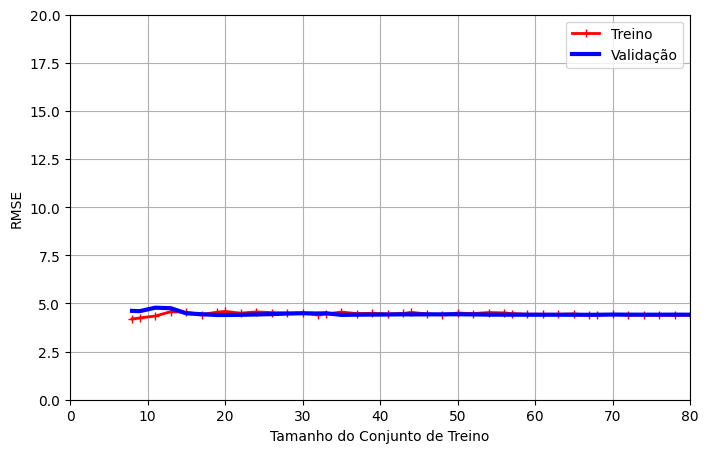

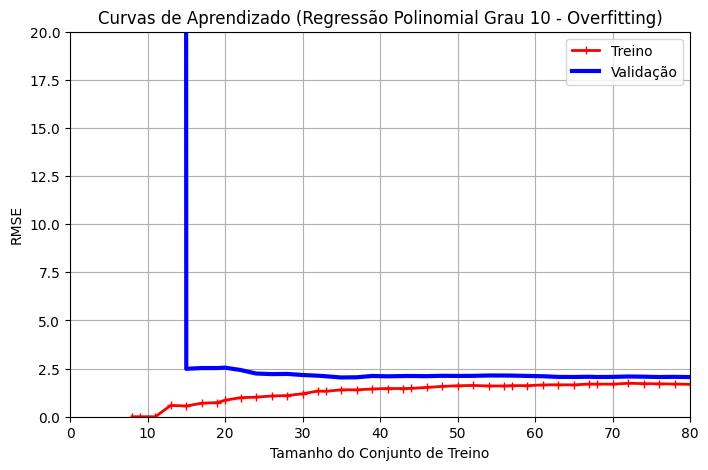

In [39]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(polynomial_regression, X, y)


lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)



plot_learning_curves(polynomial_regression, X, y)
plt.title("Curvas de Aprendizado (Regressão Polinomial Grau 10 - Overfitting)")
plt.show()

**Análise das Curvas de Aprendizado (Regressão Polinomial):**

As curvas para o modelo polinomial de grau 10 mostram um comportamento clássico de sobreajuste (overfitting). O erro no conjunto de treino é muito baixo e permanece assim. No entanto, o erro no conjunto de validação é significativamente maior, e há uma grande lacuna (gap) entre as duas curvas. Isso significa que o modelo se ajustou muito bem aos dados de treino, mas não consegue generalizar para novos dados (dados de validação). Adicionar mais dados de treino poderia ajudar a fechar essa lacuna.